In [18]:
from dataset import raw_data, df
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd

In [19]:
raw_data.dropna(axis=0)

,max_temp,mean_temp,min_temp,rainfall,sunshine,rainydays
Date,,,,,,
1910-01-01,5.30,2.50,-0.40,109.1,50.9,17.1
1910-02-01,6.80,3.80,0.70,122.6,72.2,20.6
1910-03-01,9.00,5.20,1.40,49.7,130.3,8.2
1910-04-01,9.80,5.90,2.00,93.4,122.8,16.2
1910-05-01,14.30,9.90,5.50,70.0,190.5,14.8
...,...,...,...,...,...,...
2023-03-01,8.90,5.70,2.40,132.0,81.1,20.4
2023-04-01,11.90,7.80,3.70,69.8,158.2,12.2
2023-05-01,16.20,11.60,7.00,39.0,207.2,7.3


In [20]:
raw_data.corr()

,max_temp,mean_temp,min_temp,rainfall,sunshine,rainydays
max_temp,1.000000,0.994854,0.973271,-0.216055,0.789044,-0.252899
mean_temp,0.994854,1.000000,0.991448,-0.159705,0.731137,-0.204076
min_temp,0.973271,0.991448,1.000000,-0.084693,0.646247,-0.137733
rainfall,-0.216055,-0.159705,-0.084693,1.000000,-0.454937,0.925245
sunshine,0.789044,0.731137,0.646247,-0.454937,1.000000,-0.410684
rainydays,-0.252899,-0.204076,-0.137733,0.925245,-0.410684,1.000000


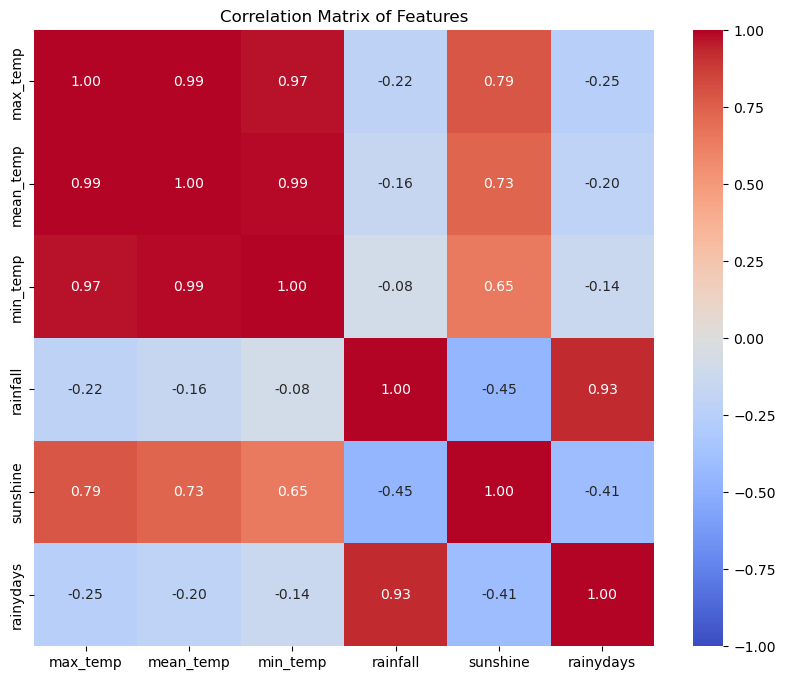

In [4]:
# Calculate the correlation matrix
corr_matrix = raw_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Features')
plt.show()

In [5]:
raw_data.corrwith(raw_data['rainfall'])

max_temp    -0.216055
mean_temp   -0.159705
min_temp    -0.084693
rainfall     1.000000
sunshine    -0.454937
rainydays    0.925245
dtype: float64

<AxesSubplot:xlabel='Date'>

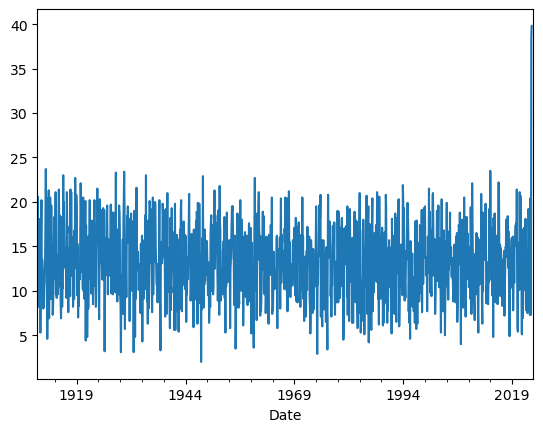

In [21]:
raw_data['rainydays'].plot()

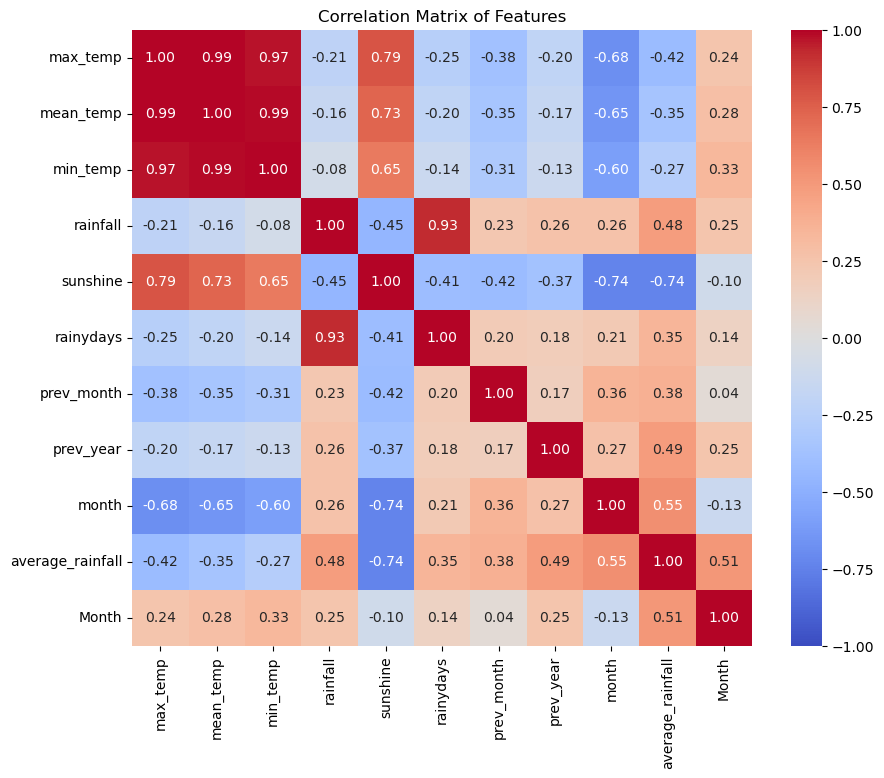

In [22]:
corr_matrix = df.corr()
# Create a heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Features')
plt.show()

In [23]:
df.corrwith(df['rainfall'])

max_temp           -0.214826
mean_temp          -0.158495
min_temp           -0.083462
rainfall            1.000000
sunshine           -0.454169
rainydays           0.925624
prev_month          0.228400
prev_year           0.264645
month               0.264284
average_rainfall    0.477420
Month               0.246066
dtype: float64

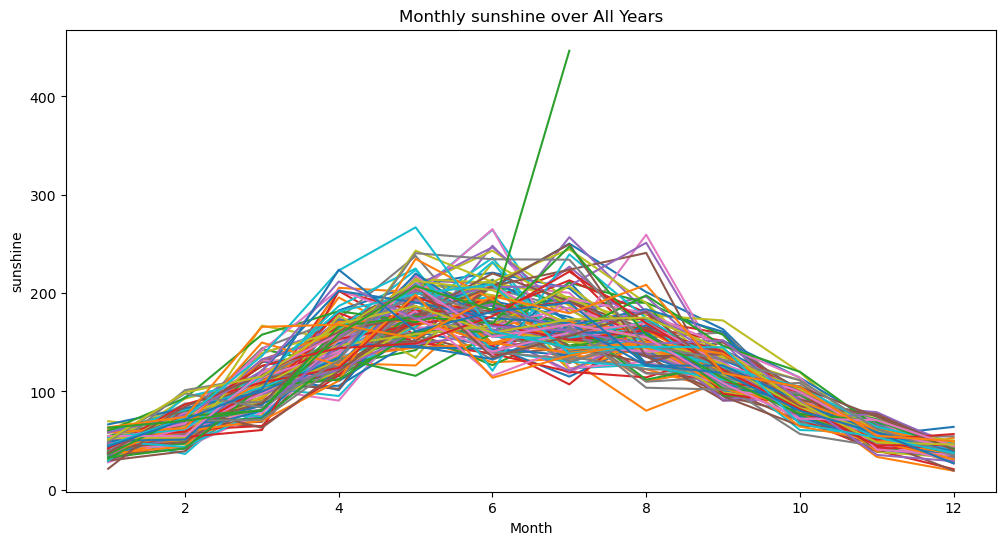

In [25]:
# Filter data for the last 15 years
end_year = df.index.year.max()
start_year = df.index.year.min() #end_year - 15
last_15_years = df[(df.index.year >= start_year) & (df.index.year <= end_year)]

plt.figure(figsize=(12, 6))
for year in range(start_year, end_year + 1):
    annual_data = df[(df.index.year == year)]
    sunshine = annual_data['sunshine']
    plt.plot(sunshine.index.month, sunshine.values) #, label=str(year)

plt.xlabel('Month')
plt.ylabel('sunshine')
plt.title('Monthly sunshine over All Years')
#plt.legend(loc='upper right')
plt.show()

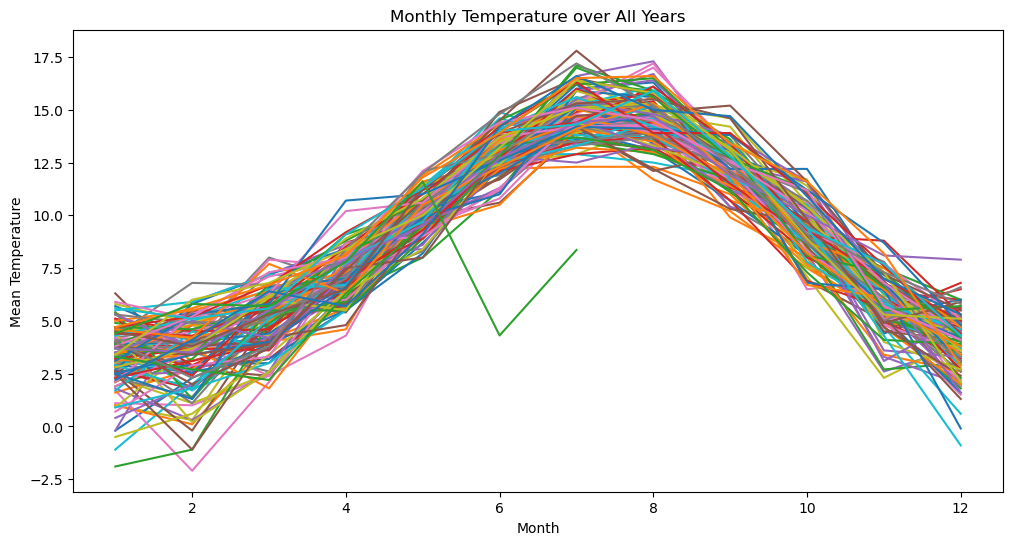

In [26]:
# Filter data for the last 15 years
end_year = df.index.year.max()
start_year = df.index.year.min() #end_year - 15
last_15_years = df[(df.index.year >= start_year) & (df.index.year <= end_year)]

plt.figure(figsize=(12, 6))
for year in range(start_year, end_year + 1):
    annual_data = df[(df.index.year == year)]
    mean_temp = annual_data['mean_temp']
    plt.plot(mean_temp.index.month, mean_temp.values) #, label=str(year)

plt.xlabel('Month')
plt.ylabel('Mean Temperature')
plt.title('Monthly Temperature over All Years')
#plt.legend(loc='upper right')
plt.show()

In [ ]:
# Filter data for the last 15 years
end_year = df.index.year.max()
start_year = df.index.year.min() #end_year - 15
last_15_years = df[(df.index.year >= start_year) & (df.index.year <= end_year)]

plt.figure(figsize=(12, 6))
for year in range(start_year, end_year + 1):
    annual_data = df[(df.index.year == year)]
    temperature = annual_data['rainfall']
    plt.plot(rainfall.index.month, rainfall.values) #, label=str(year)

plt.xlabel('Month')
plt.ylabel('Rainfall')
plt.title('Monthly Rainfall over All Years')
#plt.legend(loc='upper right')
plt.show()

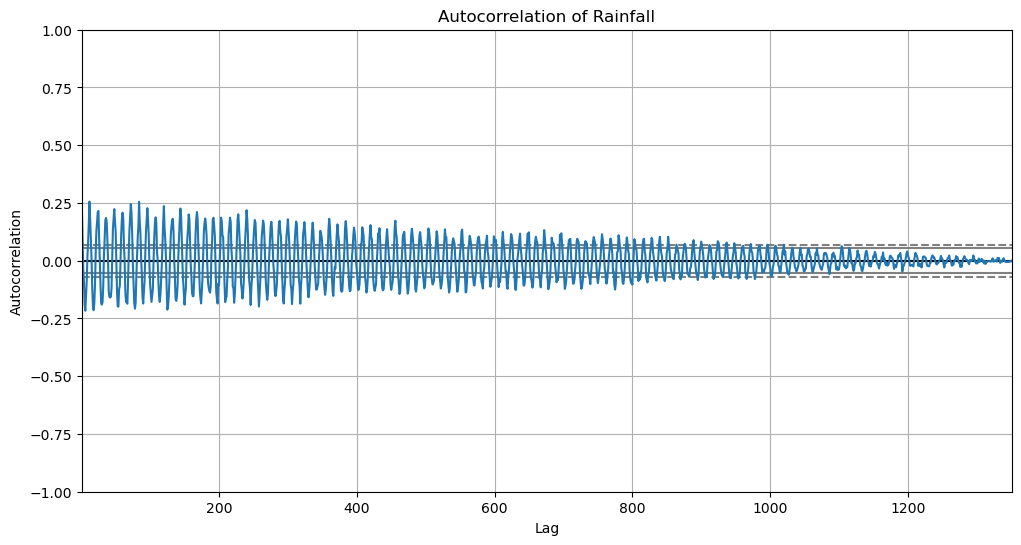

In [11]:
plt.figure(figsize=(12, 6))
pd.plotting.autocorrelation_plot(df['rainfall'])
plt.title('Autocorrelation of Rainfall')
plt.show()

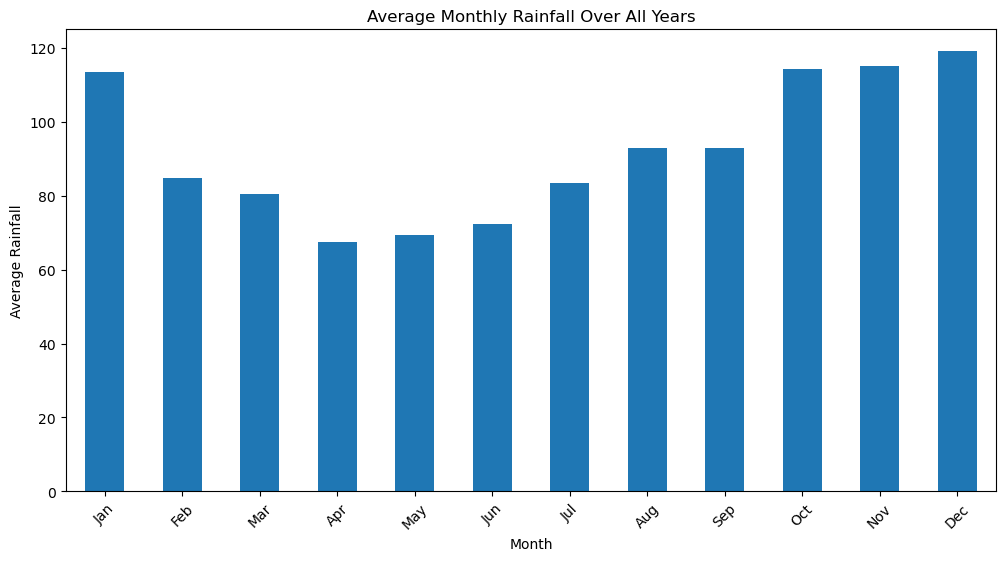

In [13]:
plt.figure(figsize=(12, 6))

# Extract month from the index
df['Month'] = df.index.month

# Calculate average rainfall for each month
average_rainfall = df.groupby('Month')['rainfall'].mean()

# Plotting the bar chart
average_rainfall.plot(kind='bar')

# Setting labels and title
plt.xlabel('Month')
plt.ylabel('Average Rainfall')
plt.title('Average Monthly Rainfall Over All Years')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

<AxesSubplot:xlabel='Month', ylabel='rainfall'>

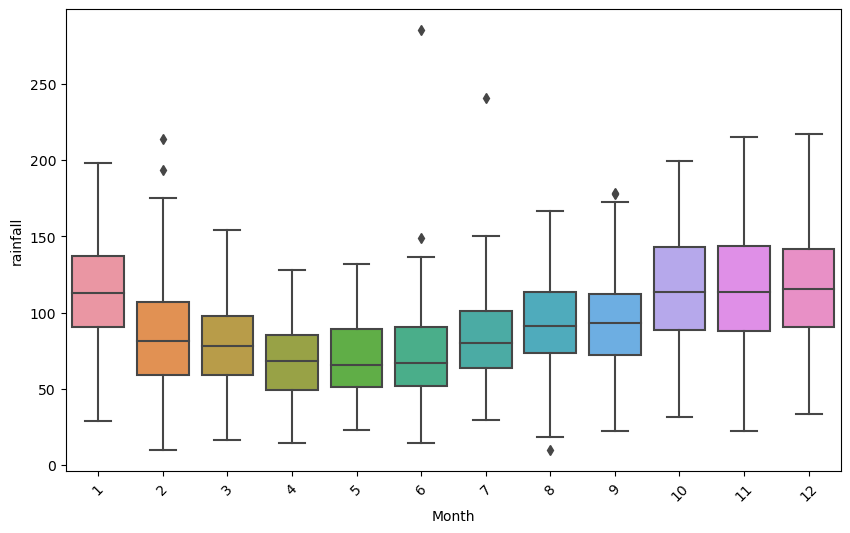

In [17]:
# Create a box plot
plt.figure(figsize=(10, 6))
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
sns.boxplot(x='Month', y='rainfall', data=df)

<AxesSubplot:xlabel='Month', ylabel='sunshine'>

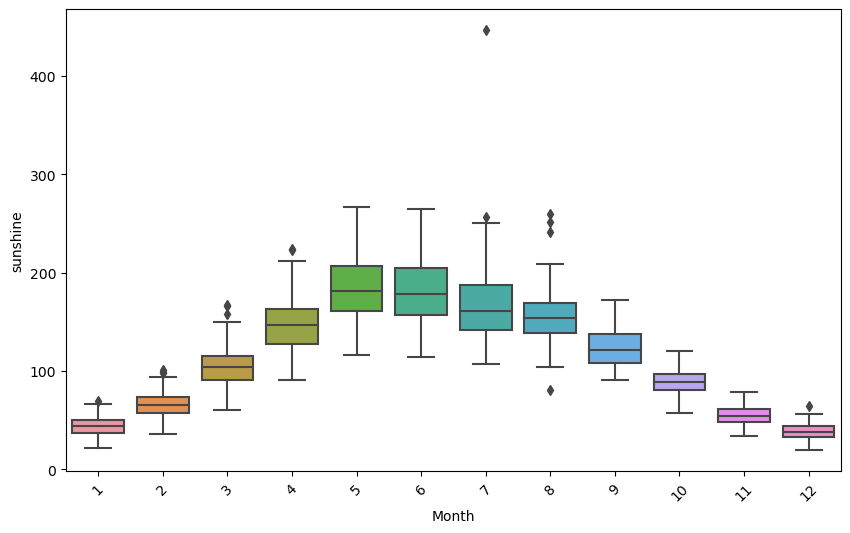

In [27]:
# Create a box plot
plt.figure(figsize=(10, 6))
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
sns.boxplot(x='Month', y='sunshine', data=df)

<AxesSubplot:xlabel='Month', ylabel='mean_temp'>

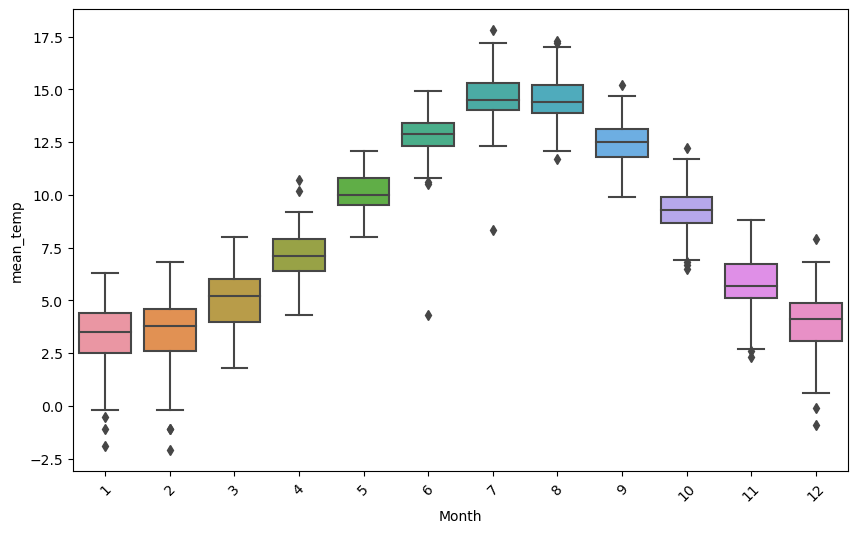

In [28]:
# Create a box plot
plt.figure(figsize=(10, 6))
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
sns.boxplot(x='Month', y='mean_temp', data=df)